 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [99]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [100]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df=pd.read_csv(whale_returns_csv)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [101]:
# Count nulls
# YOUR CODE HERE
whale_df.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [102]:
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [103]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [104]:
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.drop(columns=['Date'], inplace=True)
whale_df.sort_index(ascending=True, inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [105]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df=pd.read_csv(algo_returns_csv)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [106]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [107]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)
algo_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [108]:
algo_df.set_index(pd.to_datetime(algo_df['Date'], format="%Y/%m/%d", infer_datetime_format=True), inplace=True)
algo_df.drop(columns=['Date'], inplace=True)
algo_df.sort_index(ascending=True, inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [109]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df=pd.read_csv(sp500_history_csv)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [110]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [111]:
# Fix Data Types
# YOUR CODE HERE
columns = ["Date", "S&P 500"]
sp500_df.columns = columns

In [112]:
# sp500_df["S&P 500"] = sp500_df["S&P 500"].astype("float")
sp500_df["S&P 500"] = sp500_df["S&P 500"].str.replace('$', '').astype(float)

In [113]:
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df

,S&P 500
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [114]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [115]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [116]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
concat_returns = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
concat_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

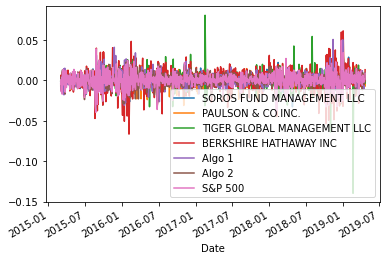

In [117]:
# Plot daily returns
# YOUR CODE HERE
concat_returns.plot()

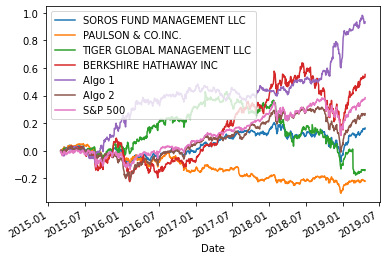

In [118]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + concat_returns).cumprod() - 1
cumulative_returns.plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [119]:
# Box plot to visually show risk
# YOUR CODE HERE


In [120]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
concat_volatility = concat_returns.std()
concat_volatility.sort_values(inplace=True)
concat_volatility

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [121]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
concat_returns.std() > concat_returns["S&P 500"].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [122]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
concat_volatility_annual = concat_returns.std() * np.sqrt(252)
concat_volatility_annual.sort_values(inplace=True)
concat_volatility_annual

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

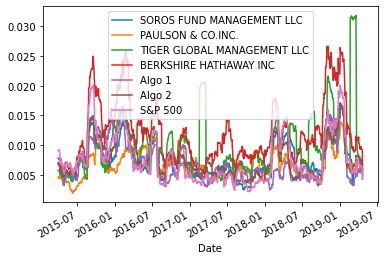

In [123]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
concat_returns.rolling(window=21).std().plot()

In [124]:
# Construct a correlation table
# YOUR CODE HERE
correlation = concat_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [125]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance = concat_returns["BERKSHIRE HATHAWAY INC"].cov(concat_returns["S&P 500"])
variance = concat_returns["BERKSHIRE HATHAWAY INC"].var()
BERK_beta = covariance / variance
BERK_beta

0.4975013478956255

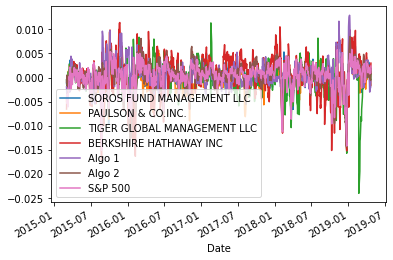

In [126]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
concat_returns_ewma = concat_returns.ewm(span=10, adjust=False).mean()
concat_returns_ewma.plot()

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [127]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (concat_returns.mean() * (252)) / (concat_returns.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values()

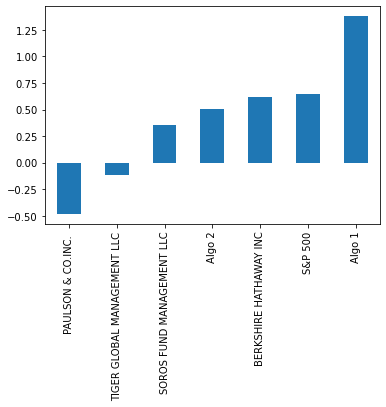

In [128]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:  
Algo1 does outperform the rest, but Algo2 is just under the SPY and BRK.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [129]:
AMZN_data_path = Path("Resources/AMZN.csv")
AMZN_data = pd.read_csv(AMZN_data_path)
AMZN_data = AMZN_data.dropna()
AMZN_data["Date"] = AMZN_data["Date"].str.replace(' 16:00:00', '')
AMZN_data['Date'] = pd.to_datetime(AMZN_data['Date'])
AMZN_data = AMZN_data.set_index('Date')
AMZN_data

,Close
Date,
2014-04-01,342.99
2014-04-02,341.96
2014-04-03,333.62
2014-04-04,323.00
2014-04-07,317.76
...,...
2020-10-05,3199.20
2020-10-06,3099.96
2020-10-07,3195.69


In [130]:
CABO_data_path = Path("Resources/CABO.csv")
CABO_data = pd.read_csv(CABO_data_path)
CABO_data = CABO_data.dropna()
CABO_data["Date"] = CABO_data["Date"].str.replace(' 16:00:00', '')
CABO_data['Date'] = pd.to_datetime(CABO_data['Date'])
CABO_data = CABO_data.set_index('Date')
CABO_data

,Close
Date,
2015-06-11,399.84
2015-06-12,376.91
2015-06-17,395.00
2015-06-18,396.00
2015-06-19,397.20
...,...
2020-10-05,1837.66
2020-10-06,1845.04
2020-10-07,1849.83


In [131]:
EPD_data_path = Path("Resources/EPD.csv")
EPD_data = pd.read_csv(EPD_data_path)
EPD_data = EPD_data.dropna()
EPD_data["Date"] = EPD_data["Date"].str.replace(' 16:00:00', '')
EPD_data['Date'] = pd.to_datetime(EPD_data['Date'])
EPD_data = EPD_data.set_index('Date')
EPD_data

,Close
Date,
2014-04-01,35.38
2014-04-02,35.24
2014-04-03,35.34
2014-04-04,35.35
2014-04-07,34.99
...,...
2020-10-05,16.45
2020-10-06,16.39
2020-10-07,16.40


In [132]:
KMI_data_path = Path("Resources/KMI.csv")
KMI_data = pd.read_csv(KMI_data_path)
KMI_data = KMI_data.dropna()
KMI_data["Date"] = KMI_data["Date"].str.replace(' 16:00:00', '')
KMI_data['Date'] = pd.to_datetime(KMI_data['Date'])
KMI_data = KMI_data.set_index('Date')
KMI_data

,Close
Date,
2014-04-01,32.88
2014-04-02,32.81
2014-04-03,32.96
2014-04-04,33.02
2014-04-07,32.24
...,...
2020-10-05,12.60
2020-10-06,12.27
2020-10-07,12.59


In [133]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
stock_data_df = pd.concat([AMZN_data, CABO_data, EPD_data, KMI_data], axis="columns", join="inner")
columns = ["AMZN", "CABO", "EPD", "KMI"]
stock_data_df.columns = columns
stock_data_df

,AMZN,CABO,EPD,KMI
Date,,,,
2015-06-11,432.97,399.84,31.35,39.78
2015-06-12,429.92,376.91,31.41,38.92
2015-06-17,427.81,395.00,31.74,39.52
2015-06-18,439.39,396.00,31.77,40.08
2015-06-19,434.92,397.20,30.84,39.54
...,...,...,...,...
2020-10-05,3199.20,1837.66,16.45,12.60
2020-10-06,3099.96,1845.04,16.39,12.27
2020-10-07,3195.69,1849.83,16.40,12.59


In [134]:
md_stock_returns = stock_data_df.pct_change()
md_stock_returns.dropna(inplace=True)
md_stock_returns

,AMZN,CABO,EPD,KMI
Date,,,,
2015-06-12,-0.007044,-0.057348,0.001914,-0.021619
2015-06-17,-0.004908,0.047996,0.010506,0.015416
2015-06-18,0.027068,0.002532,0.000945,0.014170
2015-06-19,-0.010173,0.003030,-0.029273,-0.013473
2015-06-22,0.003150,0.057402,0.007134,0.002782
...,...,...,...,...
2020-10-05,0.023744,-0.001971,0.025561,0.023558
2020-10-06,-0.031020,0.004016,-0.003647,-0.026190
2020-10-07,0.030881,0.002596,0.000610,0.026080


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [138]:
# Calculate weighted portfolio returns
weights = [1/4, 1/4, 1/4, 1/4]
# YOUR CODE HERE
weighted_portfolio_returns = md_stock_returns.dot(weights)
weighted_portfolio_returns

Date
2015-06-12   -0.021024
2015-06-17    0.017253
2015-06-18    0.011179
2015-06-19   -0.012472
2015-06-22    0.017617
                ...   
2020-10-05    0.017723
2020-10-06   -0.014211
2020-10-07    0.015042
2020-10-08    0.018939
2020-10-09    0.000514
Length: 1337, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [139]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_df = pd.concat([md_stock_returns, whale_df, sp500_returns], axis="columns", join="inner")
combined_df

,AMZN,CABO,EPD,KMI,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,,,
2015-06-12,-0.007044,-0.057348,0.001914,-0.021619,-0.002108,-0.002434,-0.005534,0.004256,-0.006994
2015-06-17,-0.004908,0.047996,0.010506,0.015416,-0.001715,-0.002333,0.000838,0.000871,0.001980
2015-06-18,0.027068,0.002532,0.000945,0.014170,0.003868,0.004804,0.008363,0.003289,0.009903
2015-06-19,-0.010173,0.003030,-0.029273,-0.013473,-0.001799,-0.000910,-0.001543,-0.009432,-0.005304
2015-06-22,0.003150,0.057402,0.007134,0.002782,0.006302,0.002397,0.003601,0.001921,0.006095
...,...,...,...,...,...,...,...,...,...
2019-04-16,0.009849,0.002831,-0.004767,0.001011,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,0.000955,0.001289,-0.012316,-0.006058,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,-0.001678,0.000039,-0.000346,-0.015236,0.001448,0.001222,0.000582,0.001916,0.001579


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

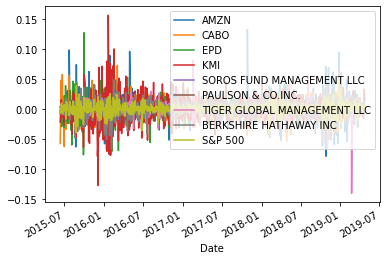

In [141]:
# Risk
# YOUR CODE HERE
combined_df.plot()

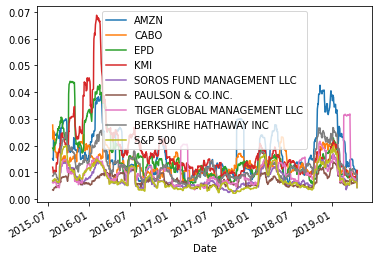

In [142]:
# Rolling
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot()

In [143]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
combined_sharpe_ratios = (combined_df.mean() * (252)) / (combined_df.std() * np.sqrt(252))
combined_sharpe_ratios = combined_sharpe_ratios.sort_values()
combined_sharpe_ratios

PAULSON & CO.INC.             -0.567085
KMI                           -0.323915
TIGER GLOBAL MANAGEMENT LLC   -0.075871
EPD                            0.150549
SOROS FUND MANAGEMENT LLC      0.407599
BERKSHIRE HATHAWAY INC         0.695946
S&P 500                        0.818411
CABO                           1.256769
AMZN                           1.478554
dtype: float64

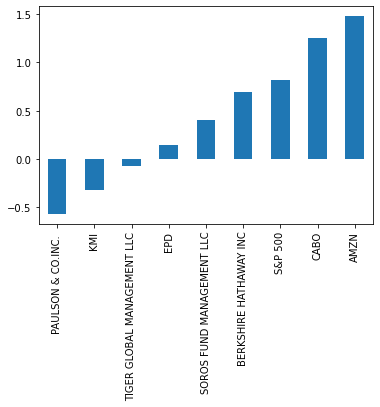

In [144]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
combined_sharpe_ratios.plot.bar()

In [145]:
# Create a correlation analysis
# YOUR CODE HERE
combined_correlation = combined_df.corr()
combined_correlation

,AMZN,CABO,EPD,KMI,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
AMZN,1.000000,0.205951,0.295198,0.233115,0.547443,0.408853,0.353279,0.633456,0.633507
CABO,0.205951,1.000000,0.156716,0.159448,0.379109,0.270819,0.249643,0.253525,0.335745
EPD,0.295198,0.156716,1.000000,0.651133,0.503290,0.383515,0.294193,0.362930,0.498187
KMI,0.233115,0.159448,0.651133,1.000000,0.475655,0.386210,0.295759,0.316517,0.486864
SOROS FUND MANAGEMENT LLC,0.547443,0.379109,0.503290,0.475655,1.000000,0.699161,0.551848,0.753934,0.838330
PAULSON & CO.INC.,0.408853,0.270819,0.383515,0.386210,0.699161,1.000000,0.427053,0.542000,0.672306
TIGER GLOBAL MANAGEMENT LLC,0.353279,0.249643,0.294193,0.295759,0.551848,0.427053,1.000000,0.416138,0.613950
BERKSHIRE HATHAWAY INC,0.633456,0.253525,0.362930,0.316517,0.753934,0.542000,0.416138,1.000000,0.754038
S&P 500,0.633507,0.335745,0.498187,0.486864,0.838330,0.672306,0.613950,0.754038,1.000000


In [146]:
# Beta
# YOUR CODE HERE
combined_covariance = combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df["S&P 500"])
variance = combined_df["BERKSHIRE HATHAWAY INC"].var()
combined_BERK_beta = covariance / variance
combined_BERK_beta

0.4705555860832601